# NetworkX Introduction

In this tutorial we aim to introduce NetworkX basic functionality. "NetworkX is a Python toolbox for the creation, manipulation and study of the structure, dynamics and functions of complex networks." [1]

In [405]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

NumPy: Numerical Python, is one of the most important foundational packages for numerical computing in Python. Most computational packages providing scientific functionality use NumPy’s array objects as the method for data exchange.

matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 
matplotlib.pyplot: is a state-based interface to matplotlib. It provides an implicit way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.
pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.

## 1. Creating a Graph

In [406]:
# Create a networkx graph object

g = nx.Graph() 

In [407]:
# Add edges to to the graph object
# Each tuple represents an edge between two nodes

g.add_edges_from([
                (1,2), 
                (1,3), 
                (3,4), 
                (1,5), 
                (3,5),
                (4,2),
                (2,3),
                (3,0)])

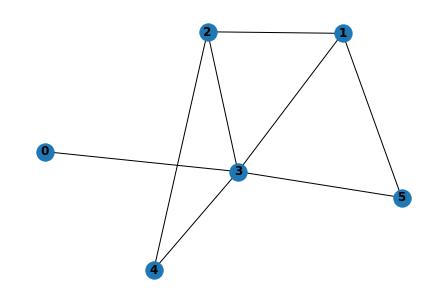

In [408]:
# Draw the resulting graph
nx.draw(g, with_labels=True, font_weight='bold')

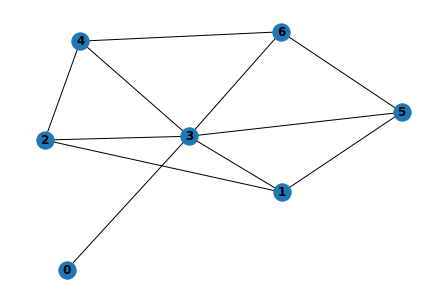

In [409]:
g.add_edge(5,6) 
g.add_edge(4,6) 
g.add_edge(3,6) 
nx.draw(g, with_labels=True, font_weight='bold')

### Importing Karate Dataset

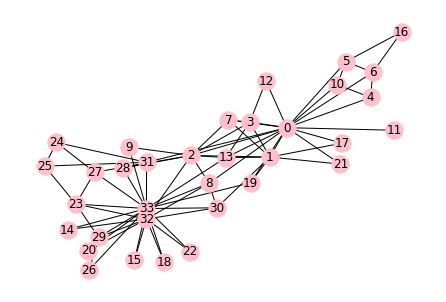

In [410]:
g = nx.karate_club_graph()
nx.draw(g, node_color='pink', with_labels=True, arrowsize=10, node_size=300)

## 2. Adding Attributes to Nodes and Edges¶

In [411]:
cities = nx.Graph()
cities.add_edge('San Diego', 'Los Angeles', dist = 120.5)
cities.add_edge('New York', 'Los Angeles', dist = 2789.4)
cities.add_edge('New York', 'San Diego', dist = 2759.)
cities.add_edge('Boston', 'New York', dist = 215.3)
nx.get_edge_attributes(cities, 'dist')

{('San Diego', 'Los Angeles'): 120.5,
 ('San Diego', 'New York'): 2759.0,
 ('Los Angeles', 'New York'): 2789.4,
 ('New York', 'Boston'): 215.3}

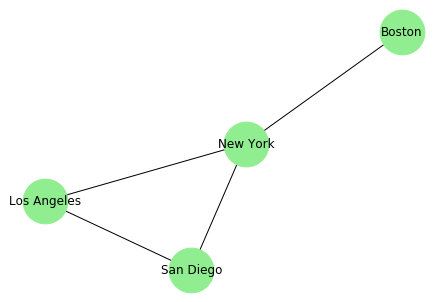

In [412]:
nx.draw(cities, node_color='lightgreen', with_labels=True, arrowsize=40, node_size=2000)

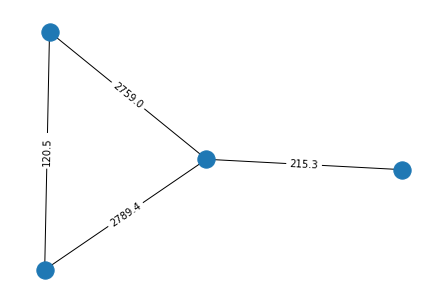

In [413]:
# pos: a variable to hold the node positioning algorithms for graph drawing.
# most common: spring_layout 
# other possible layouts: random_layout, circular_layout, shell_layout see NetworkX documentation for more.

pos = nx.spring_layout(cities)
nx.draw(cities, pos)

edge_labels = nx.get_edge_attributes(cities,'dist')
nx.draw_networkx_edge_labels(cities, pos, edge_labels = edge_labels)
plt.show()

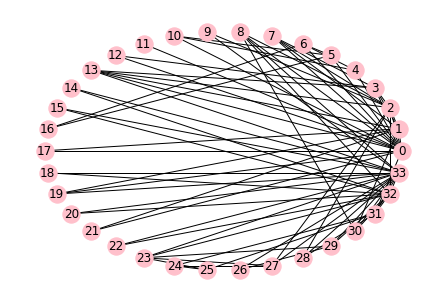

In [414]:
# example on pos:

nx.draw(g, pos = nx.circular_layout(g), node_color='pink', with_labels=True, arrowsize=10, node_size=300)

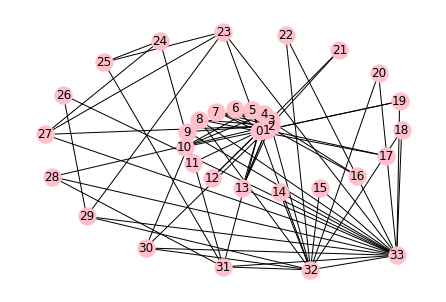

In [415]:
nx.draw(g, pos = nx.spiral_layout(g), node_color='pink', with_labels=True, arrowsize=10, node_size=300)

### Adding attributes to nodes

In [416]:
nx.set_node_attributes(cities, {'Boston': "East Coast", 'New York': "Big Apple"}, name="desc")

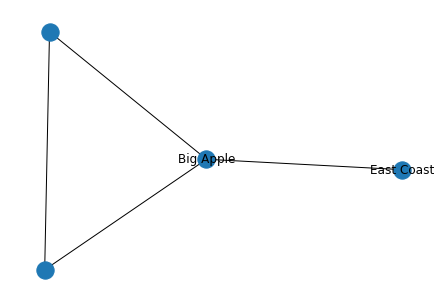

In [417]:
nx.draw(cities, pos)
attr_labels = nx.get_node_attributes(cities,'desc')
nx.draw_networkx_labels(cities, pos, labels = attr_labels)
plt.show()

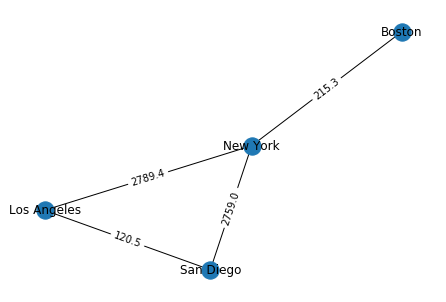

In [418]:
pos = nx.spring_layout(cities)
nx.draw(cities, pos)
nx.draw_networkx_edge_labels(cities, pos, edge_labels = edge_labels)
nx.draw_networkx_labels(cities, pos)
plt.show()

## 3. Directed Graphs

directed edges: [(1, 2), (1, 4), (2, 3), (2, 4), (4, 3)]


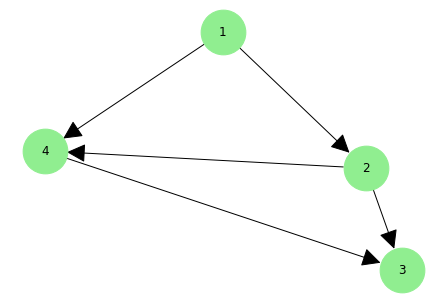

In [419]:
dg = nx.DiGraph()
dg.add_edges_from([(1,2), 
                   (2,3), 
                   (2,4), 
                   (1,4), 
                   (4,3)])
print ('directed edges:', dg.edges())
nx.draw(dg, node_color='lightgreen', with_labels=True, arrowsize=40, node_size=2000)

## 4. Getting Data From a File

We will download facebook sample data from https://snap.stanford.edu/data/egonets-Facebook.html. The dataset is from Stanford Large Network Dataset3 (SNAP) collection. The SNAP collection includes a variety of networks such as social networks, citation networks, Twitter networks or open communities like Live Journal. The Facebook dataset contains an plain text file representing the edge list of the network. The facebook network is undirected and unweighted graph that contains users of Facebook (nodes) and their friendship relations (edges).

In [420]:
data = nx.read_edgelist("email-Eu-core.txt") 

# no. of nodes:
data.order()

1005

In [421]:
# no. of edges 
data.size()

16706

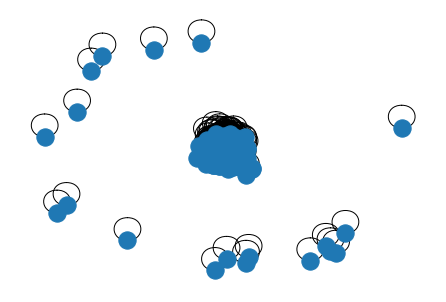

In [422]:
nx.draw(data)

In [423]:
pos = nx.spring_layout(data,iterations = 5)

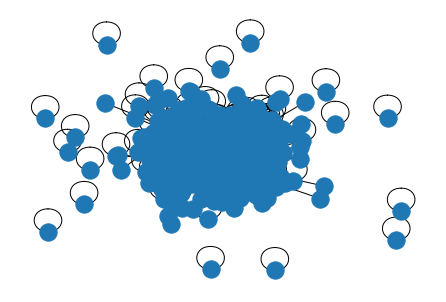

In [424]:
nx.draw(data, pos)

In [425]:
# Configure plotting in Jupyter

plt.rcParams.update({
   'figure.figsize': (20, 15),
   'axes.spines.right': False,
   'axes.spines.left': False,
   'axes.spines.top': False,
   'axes.spines.bottom': False})

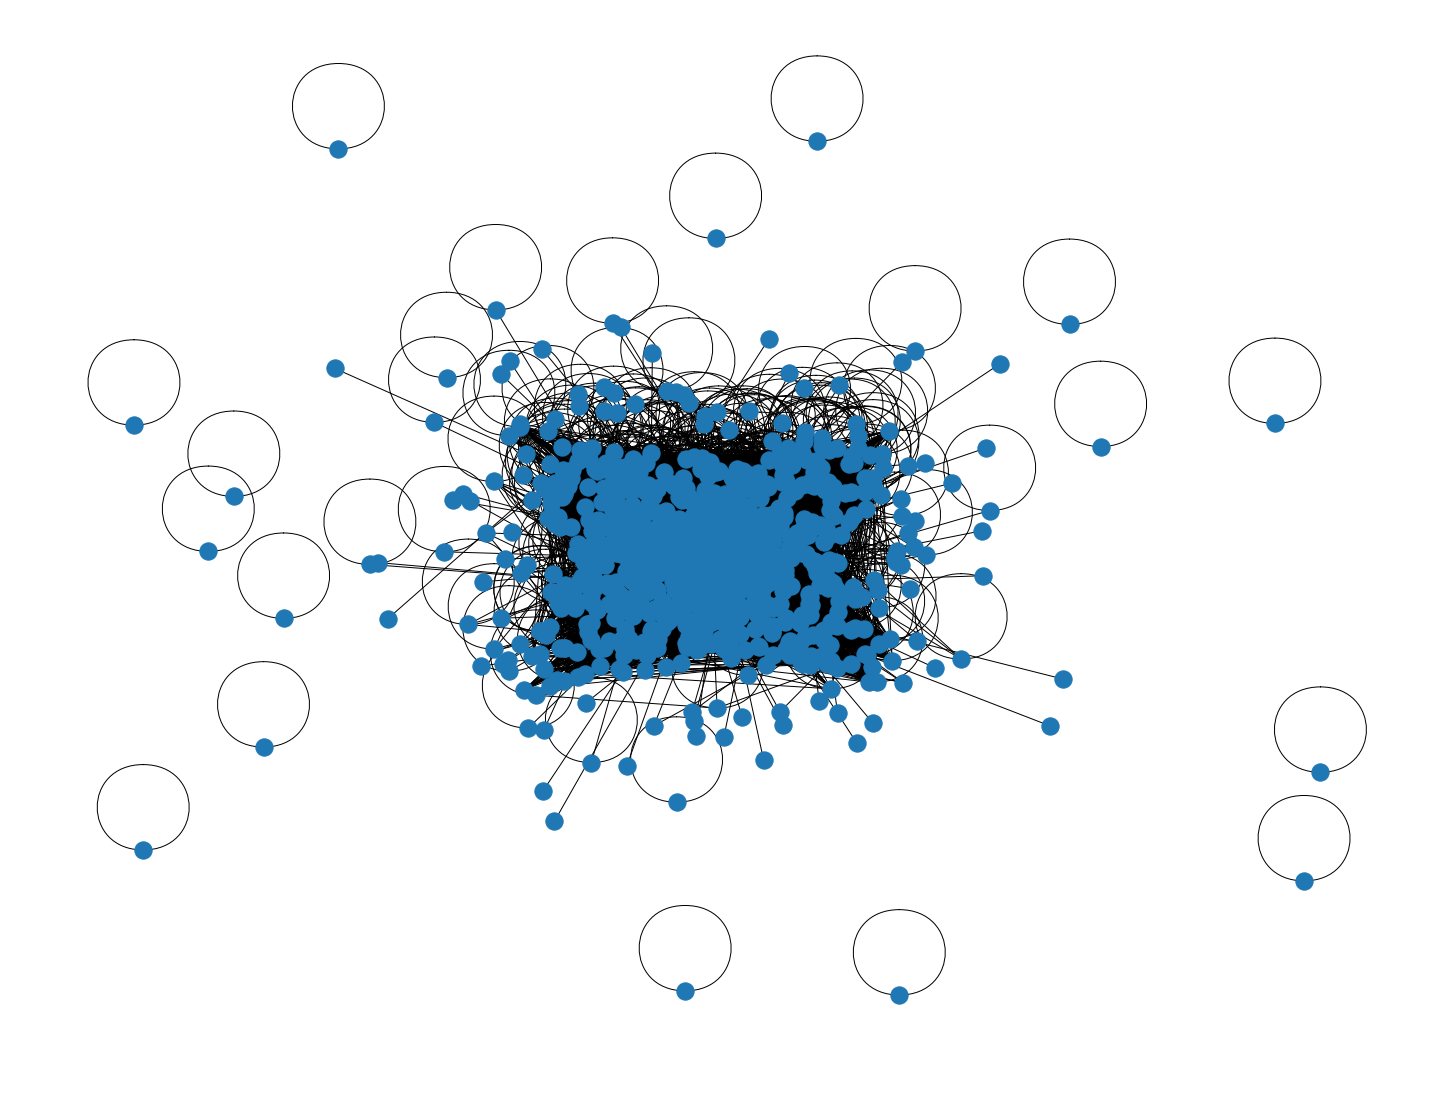

In [426]:
nx.draw(data, pos)

In [427]:
giant = max(nx.connected_components(data), key=len)

In [428]:
Gcc = sorted(nx.connected_components(data), key=len, reverse=True)
G0 = data.subgraph(Gcc[0])

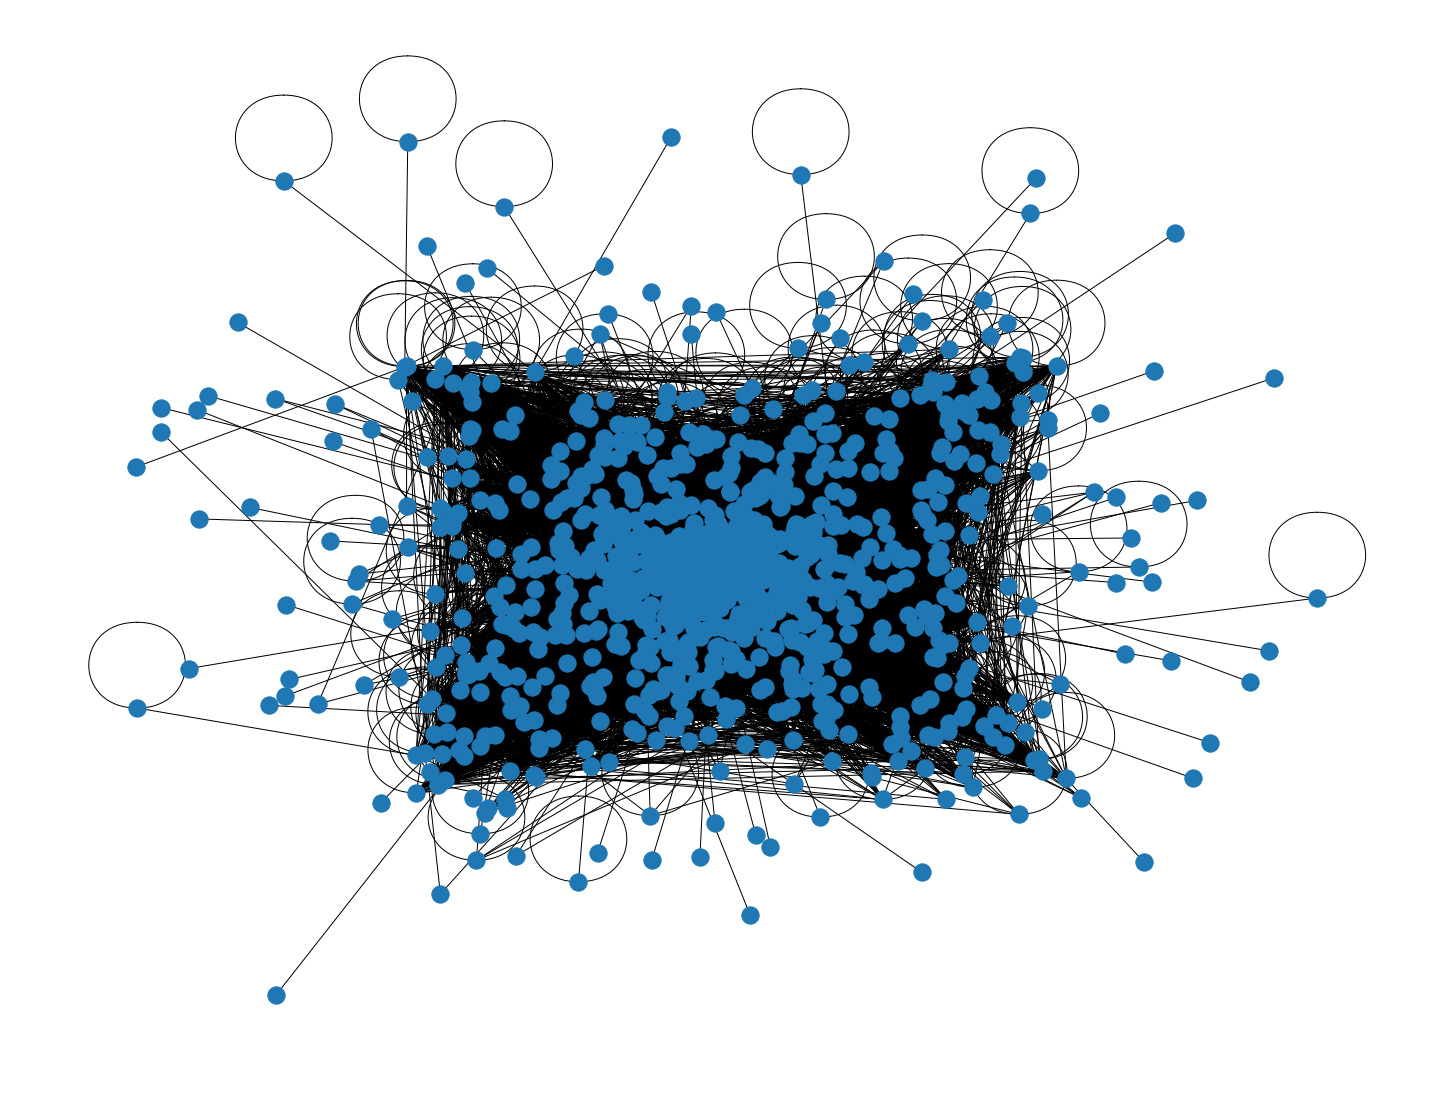

In [429]:
pos = nx.spring_layout(G0,iterations = 5)
nx.draw(G0, pos)

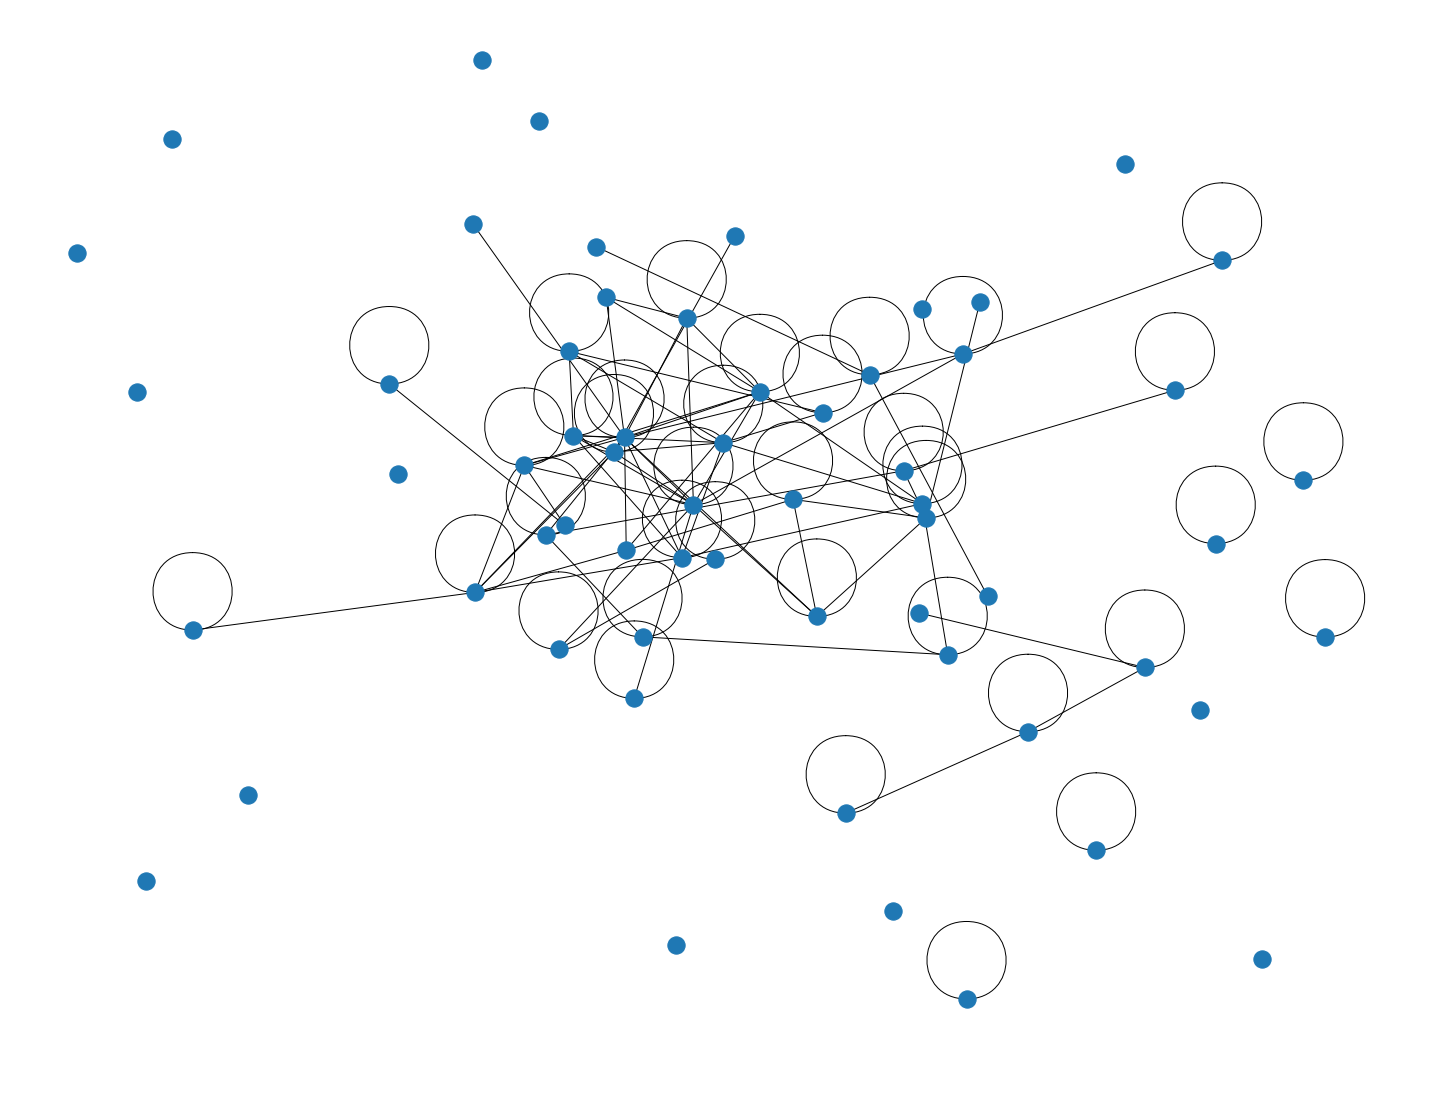

In [430]:
import random
k = 60
sampled_nodes = random.sample(G0.nodes, k)
sampled_graph = G0.subgraph(sampled_nodes)

# This will preserve correct edge connectivity from the parent graph

pos = nx.spring_layout(sampled_graph,iterations = 5)
nx.draw(sampled_graph, pos)

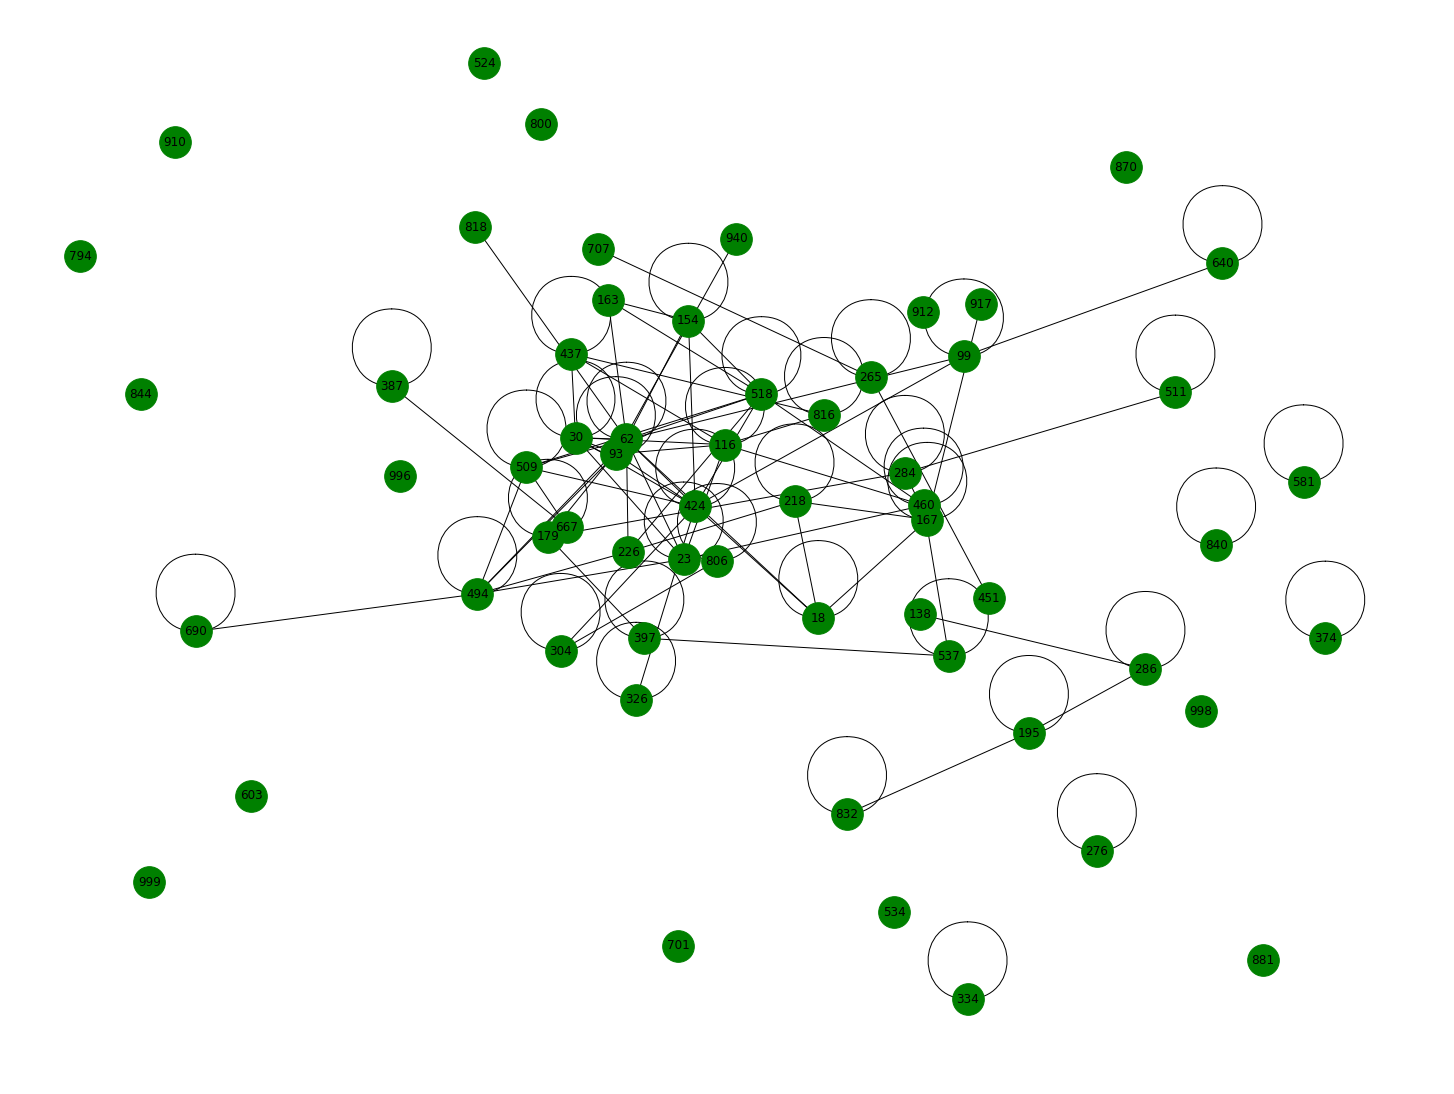

In [431]:
nx.draw(sampled_graph, pos, node_color='green', with_labels=True, node_size=1000)
plt.show()

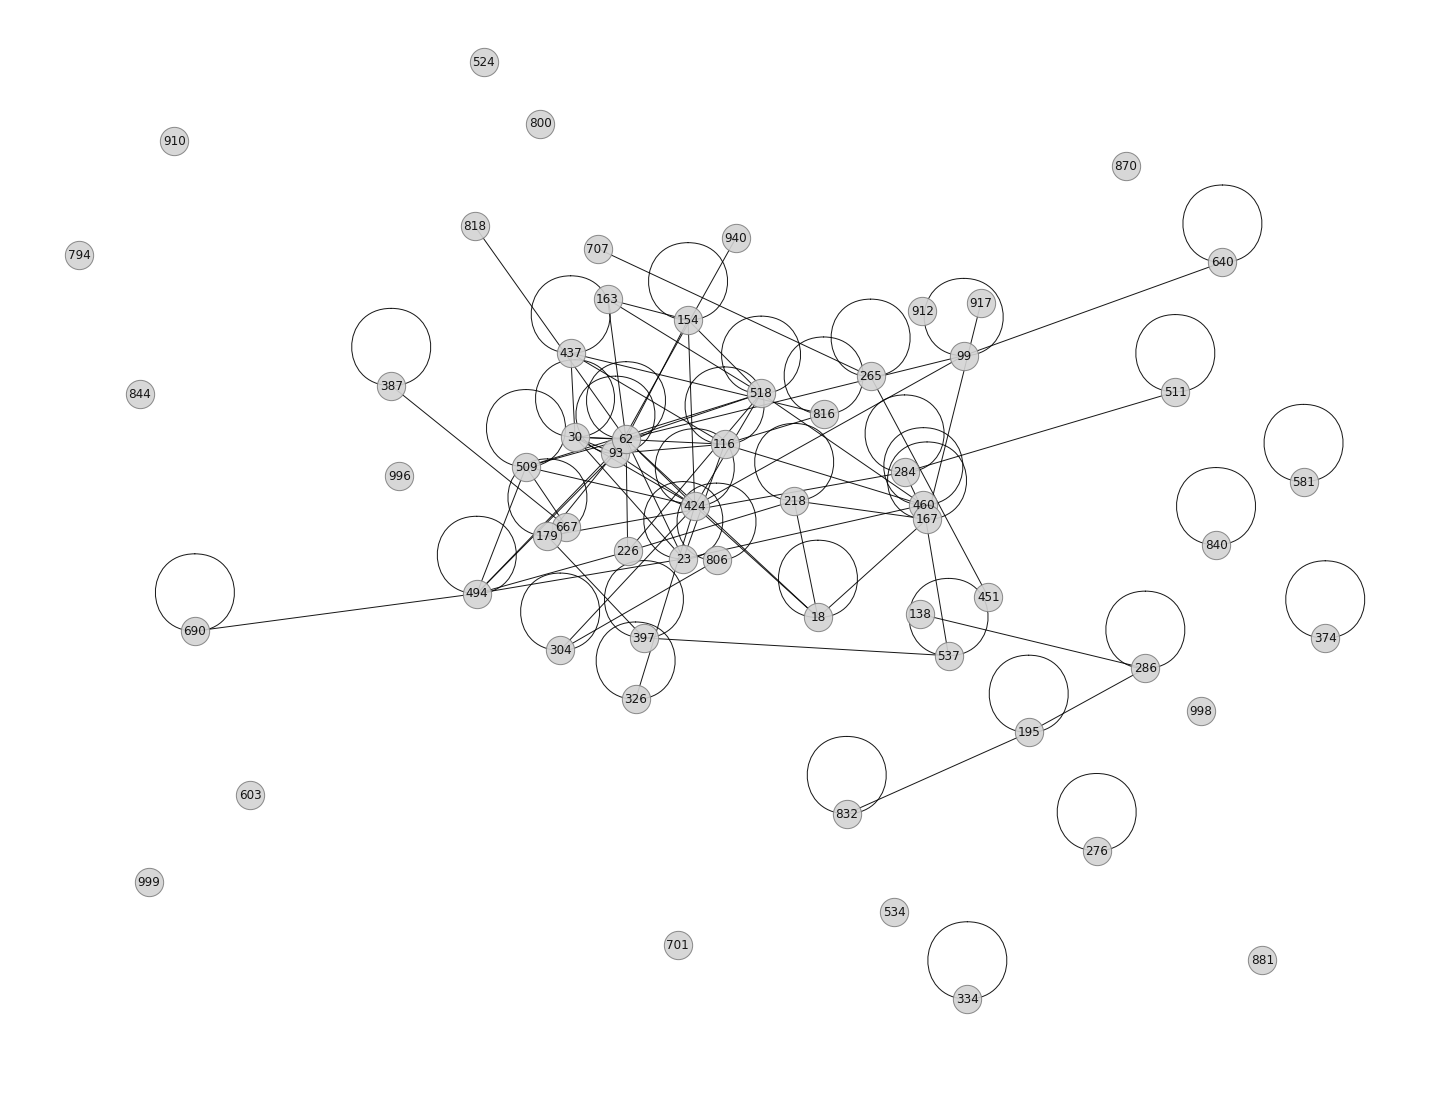

In [432]:
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
nx.draw(sampled_graph, pos, with_labels=True, node_color="lightgrey", **options)

## 5. Let's Run Some Basic Descriptive Analysis

In [433]:
#nx.shortest_path(sampled_graph, source='361', target='74')

In [434]:
# print(nx.average_shortest_path_length(sampled_graph))
# this will generat an error since the graph is not connected
# We have to find the giant component

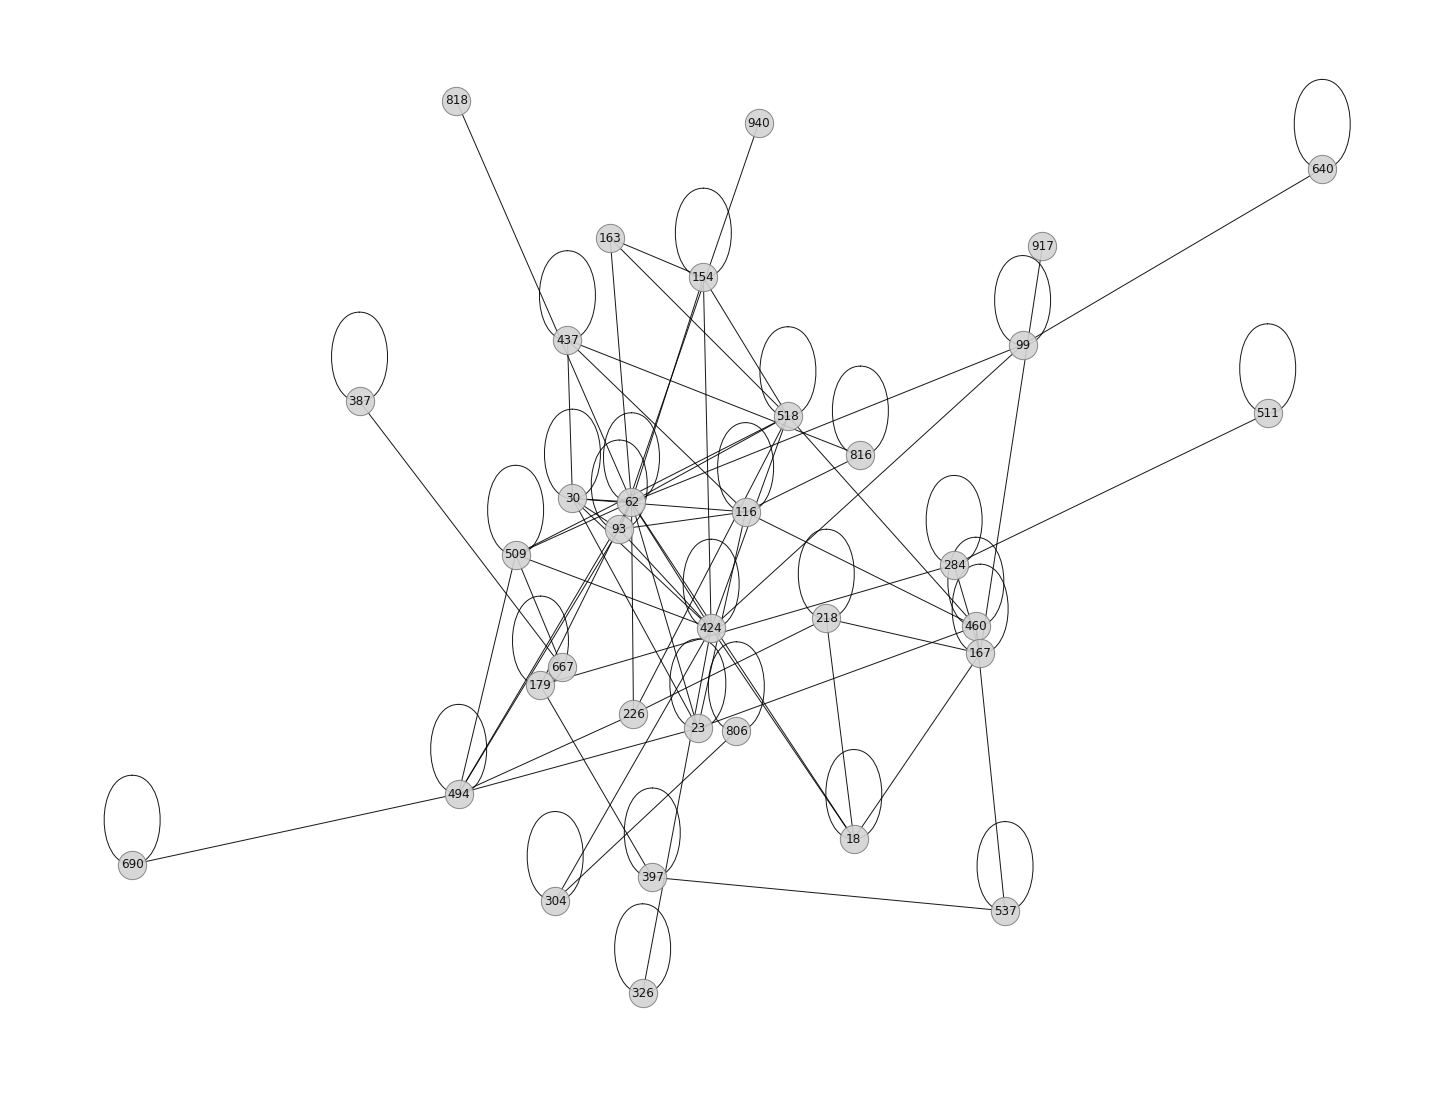

In [435]:
Gcc = sorted(nx.connected_components(sampled_graph), key=len, reverse=True)
new_graph = data.subgraph(Gcc[0])
nx.draw(new_graph, pos, with_labels=True, node_color="lightgrey", **options)

In [436]:
print(nx.average_shortest_path_length(new_graph))

2.82174688057041


In [437]:
nx.diameter(new_graph)

6

In [438]:
nx.periphery(new_graph)

['917', '511', '816', '806', '387']

In [439]:
nx.radius(new_graph) 

3

In [440]:
nx.center(new_graph) 

['62']

## 6. Centrality Measures

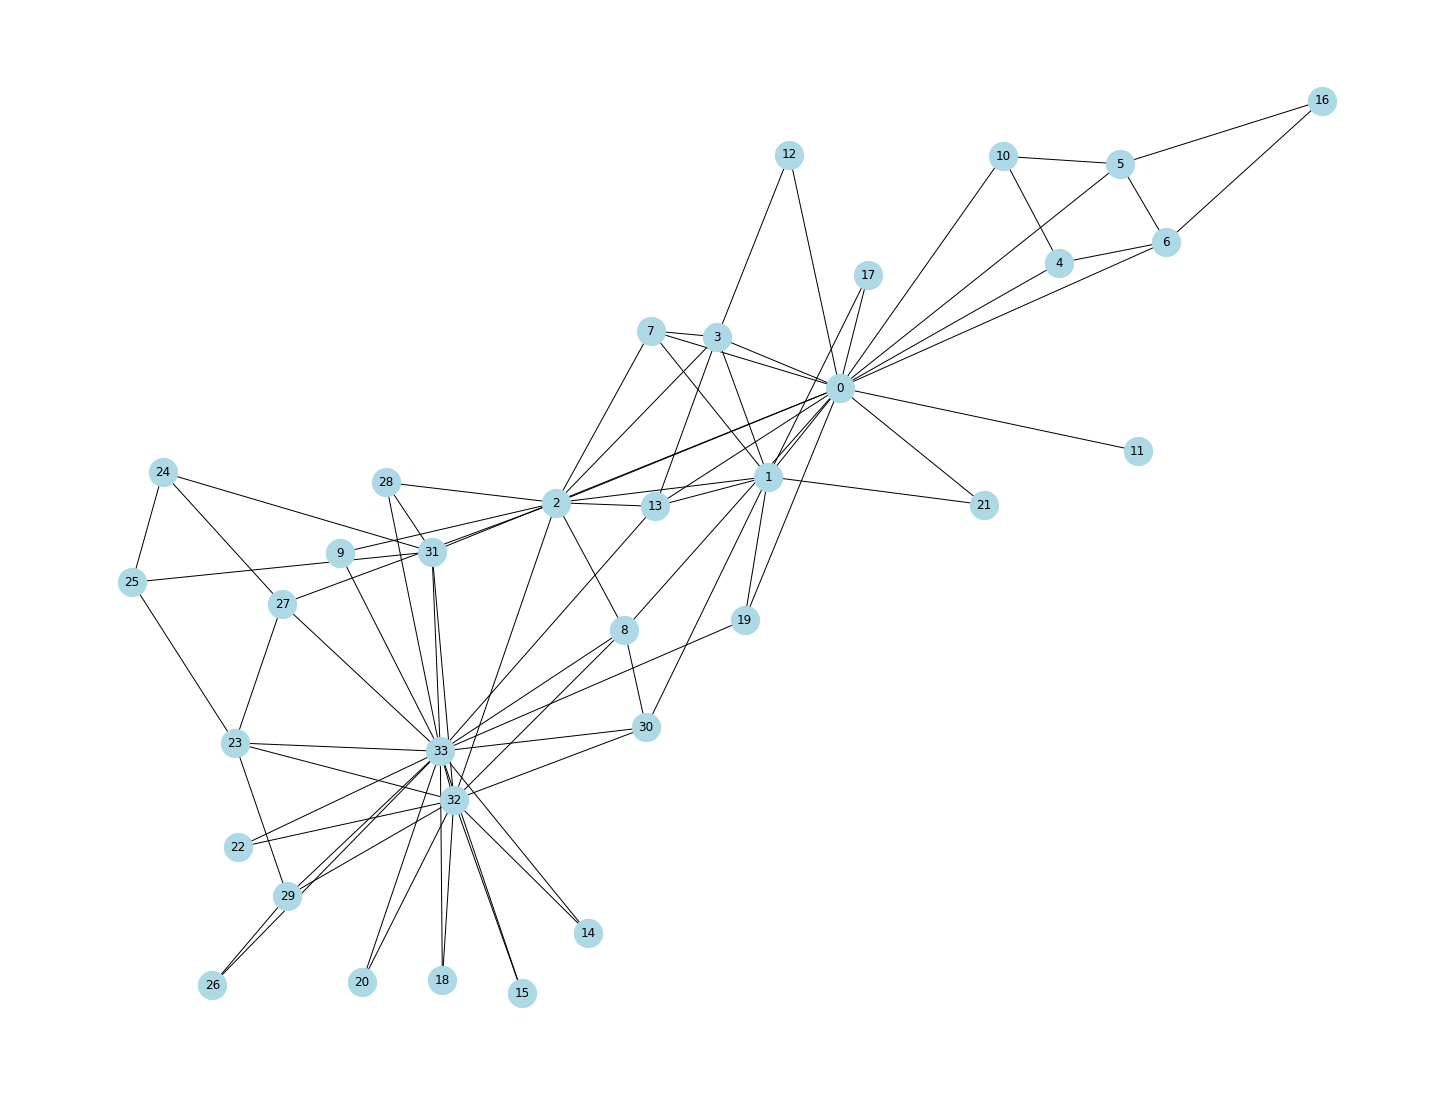

In [441]:
# The karate example

G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G, node_color = 'lightblue', with_labels=True, node_size=800)

In [442]:
deg_centrality = nx.degree_centrality(G)
deg_centrality

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [443]:
# pandas is an open source data analysis and manipulation tool, built on top of the Python programming language. 

import pandas as pd

def summary(G):
    cc = nx.closeness_centrality(G)
    df = pd.DataFrame.from_dict({
        'node': list(cc.keys()),
        'centrality': list(cc.values())
    })
    return df.sort_values('centrality', ascending=False)[:10]

In [444]:
summary(G)

,node,centrality
0,0,0.568966
2,2,0.559322
33,33,0.550000
31,31,0.540984
13,13,0.515625
32,32,0.515625
8,8,0.515625
19,19,0.500000
1,1,0.485294
3,3,0.464789


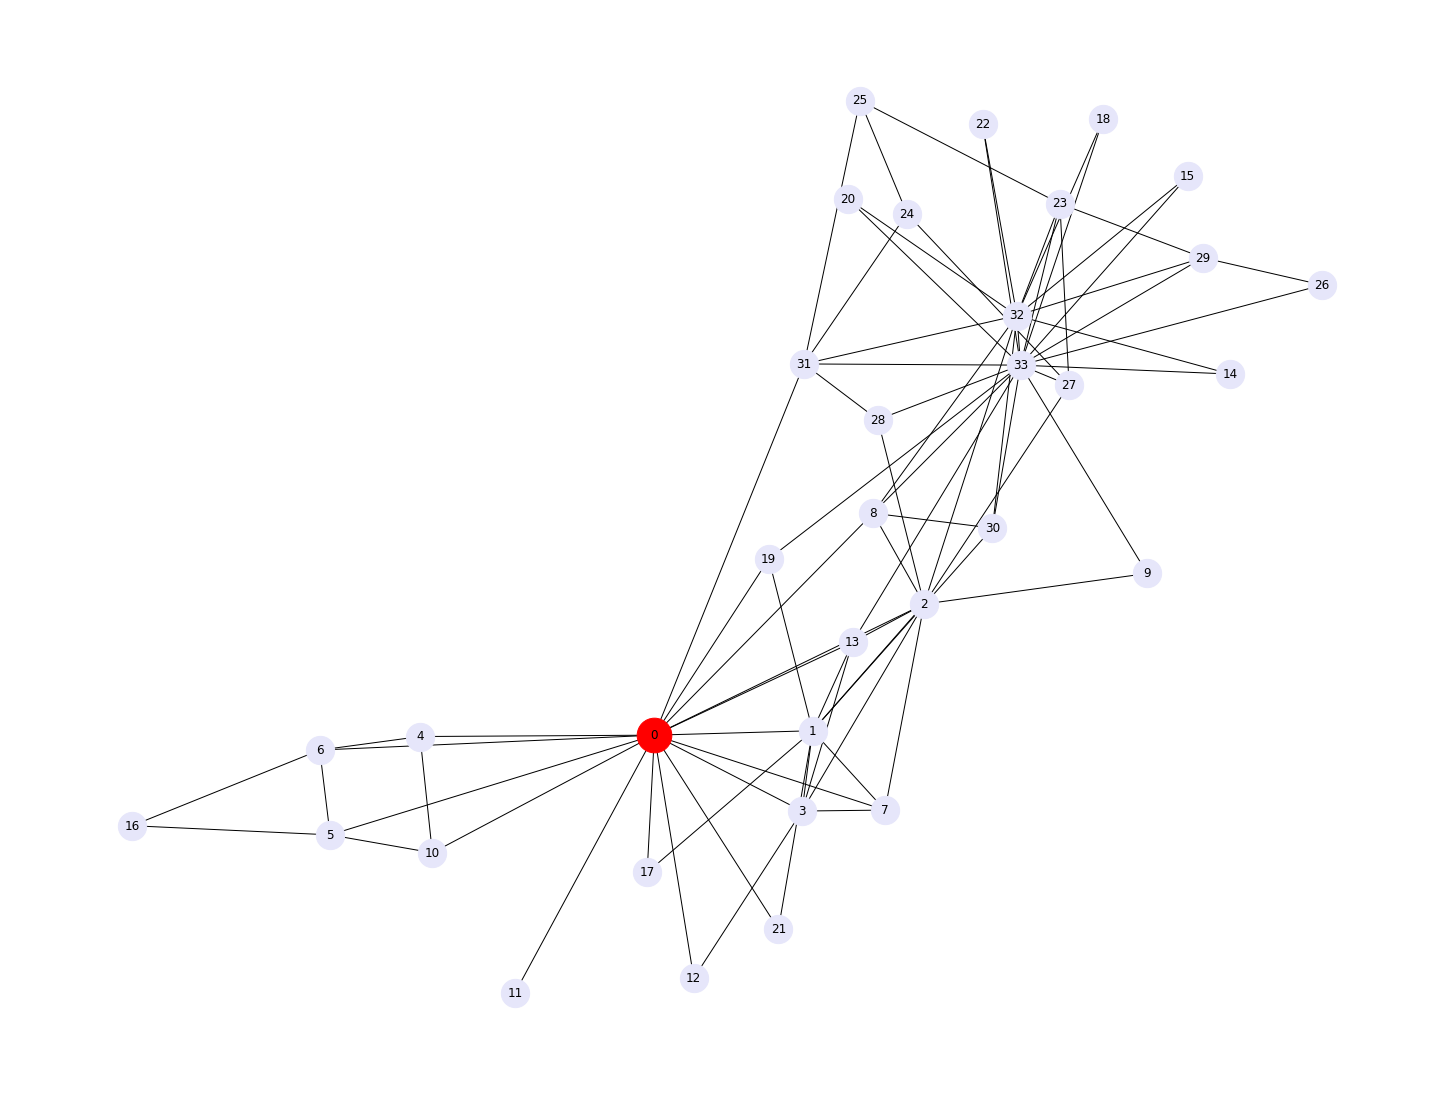

In [445]:
ego = 0
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = "lavender", node_size = 800, with_labels = True)
options = {"node_size": 1200, "node_color": "r"}
nx.draw_networkx_nodes(G, pos, nodelist=[ego], **options)
plt.show()

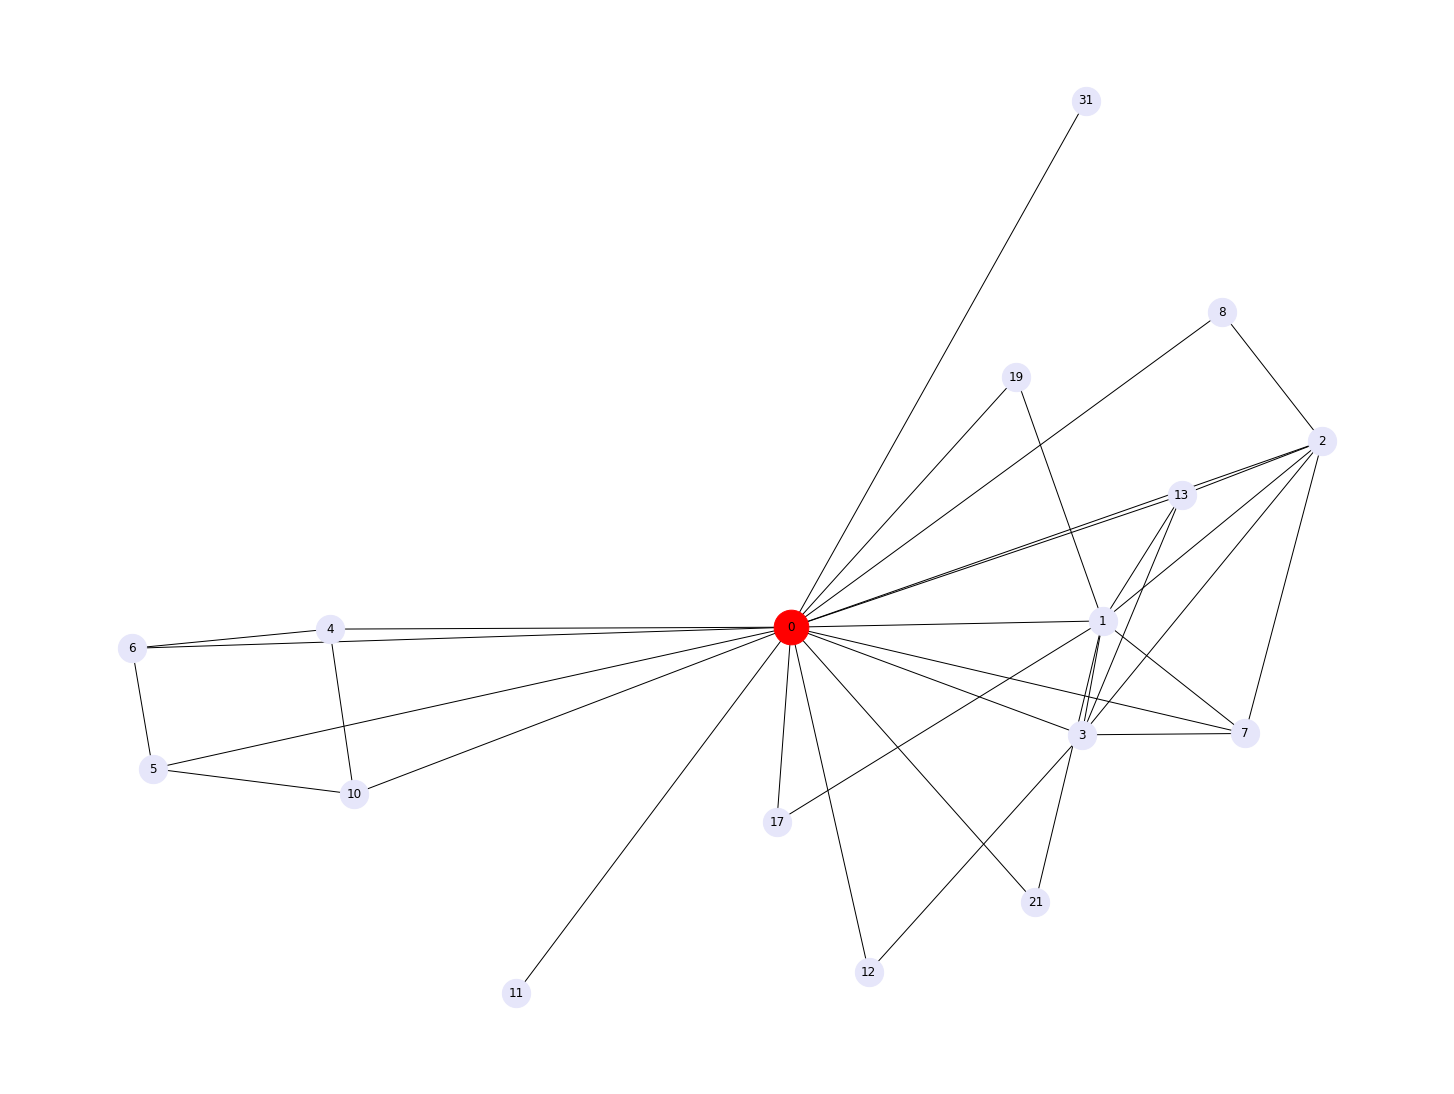

In [447]:
# create ego network
hub_ego = nx.ego_graph(G, ego)
  
# showing the ego network
nx.draw(hub_ego, pos, node_color="lavender", node_size = 800, with_labels = True)
nx.draw_networkx_nodes(hub_ego, pos, nodelist = [ego], **options)
  
plt.show()

References 

[1] Laura Igual, Santi Seguí, Introduction to Data Science, A Python Approach to Concepts, Techniques and Applications.